# Исследование успешности компьютерных игр

**Постановка задачи**

Заказчик исследования - интернет-магазин, который продаёт игры по всему миру. Необходимо на базе открытых исторических данных о продажах игр, оценок пользователей и экспертов выявить определяющие успешность игры закономерности, для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цели исследования**
1. Выявить критерии, по которым можно определить потенциально успешную игру
2. Применить наблюдения на актуальный период данных, чтобы спланировать рекламные кампании на следующий год

**Ход исследования**

Данные открытых исторических источников я получу из файла `/datasets/games.csv`. О качестве данных ничего не известно, поэтому перед исследовательским анализом я ознакомлюсь с данными. 

На этапе предобработки данных я обработаю пропуски, дубликаты, приведу данные к нужным типам. Затем добавлю необходимые для исследования столбцы с данными и приступлю к проведению исследовательского анализа.

Таким образом моё исследование пройдёт в восемь этапов:
- Обзор данных
- Предобработка данных
- Добавление столбцов с необходимыми расчётами в данные
- Проведение анализа данных за весь период
- Проведение анализа данных за актуальный период
- Составление портретов пользователей по регионам
- Проверка гипотез
- Написание общего вывода

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Открытие-данных" data-toc-modified-id="Открытие-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Столбец-name" data-toc-modified-id="Столбец-name-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Столбец <code>name</code></a></span></li><li><span><a href="#Столбец-platform" data-toc-modified-id="Столбец-platform-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Столбец <code>platform</code></a></span></li><li><span><a href="#Столбец-year_of_release" data-toc-modified-id="Столбец-year_of_release-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Столбец <code>year_of_release</code></a></span></li><li><span><a href="#Столбец-genre" data-toc-modified-id="Столбец-genre-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Столбец <code>genre</code></a></span></li><li><span><a href="#Столбцы-na_sales,-eu_sales,-jp_sales,-other_sales" data-toc-modified-id="Столбцы-na_sales,-eu_sales,-jp_sales,-other_sales-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Столбцы <code>na_sales</code>, <code>eu_sales</code>, <code>jp_sales</code>, <code>other_sales</code></a></span></li><li><span><a href="#Столбец-critic_score" data-toc-modified-id="Столбец-critic_score-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Столбец <code>critic_score</code></a></span></li><li><span><a href="#Столбец-user_score" data-toc-modified-id="Столбец-user_score-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Столбец <code>user_score</code></a></span></li><li><span><a href="#Столбец-rating" data-toc-modified-id="Столбец-rating-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Столбец <code>rating</code></a></span></li><li><span><a href="#Столбец-total_sales" data-toc-modified-id="Столбец-total_sales-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Столбец <code>total_sales</code></a></span></li><li><span><a href="#Проверка-на-неявные-дубликаты" data-toc-modified-id="Проверка-на-неявные-дубликаты-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Проверка на неявные дубликаты</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Данные-о-количестве-игр-и-продажах-по-годам" data-toc-modified-id="Данные-о-количестве-игр-и-продажах-по-годам-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Данные о количестве игр и продажах по годам</a></span></li><li><span><a href="#Анализ-актуального-периода" data-toc-modified-id="Анализ-актуального-периода-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ актуального периода</a></span></li><li><span><a href="#Портреты-пользователей-по-регионам" data-toc-modified-id="Портреты-пользователей-по-регионам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Портреты пользователей по регионам</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы" data-toc-modified-id="Самые-популярные-платформы-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Самые популярные платформы</a></span></li><li><span><a href="#Самые-популярные-жанры" data-toc-modified-id="Самые-популярные-жанры-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Самые популярные жанры</a></span></li><li><span><a href="#Влияние-на-продажи-рейтинга-ESRB" data-toc-modified-id="Влияние-на-продажи-рейтинга-ESRB-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Влияние на продажи рейтинга ESRB</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные" data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-и-Sports-разные-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action и Sports разные</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from IPython.display import Markdown

sns.set_style('darkgrid')

print('Библиотеки успешно импортированы')

Библиотеки успешно импортированы


## Открытие данных

In [2]:
games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
print('Данные успешно загружены')

Данные успешно загружены


## Изучение данных

In [3]:
original_len = len(games)
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


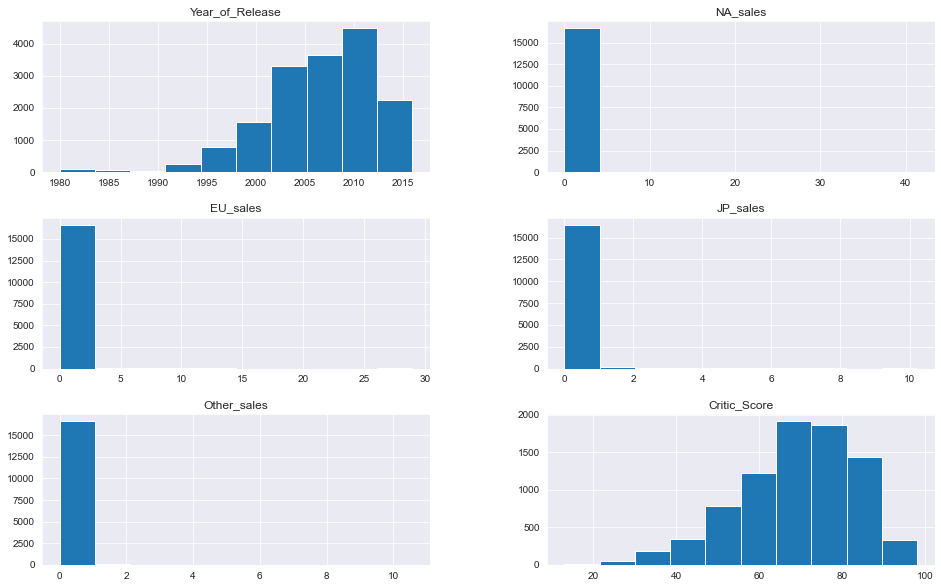

In [6]:
games.hist(figsize=(16, 10))
plt.show()

В нашем распоряжении датафрейм, состоящий из 11 столбцов и 16715 строк. Данные нуждаются в предобработке, на первый взгляд присутствуют пропуски, некорректные типы данных, в следующем разделе выполним предобработку данных для дальнейшего исследования.

## Предобработка данных

In [7]:
# Для удобства приведём названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

Проверим данные на наличие явных дубликатов.

In [8]:
print('Количество явных дубликатов:', games.duplicated().sum())

Количество явных дубликатов: 0


### Столбец `name`

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


У столбца с названием игр всего два пропуска, от этих данных мы можем избавиться.

In [10]:
games.dropna(subset=['name'], inplace=True)
games['name'].isna().sum()

0

### Столбец `platform`

In [11]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

В столбце `platform` нет пропусков и неявных дубликатов, его можно оставить без изменений.

### Столбец `year_of_release`

In [12]:
games['year_of_release'].isna().sum()

269

In [13]:
games[games['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [14]:
# Посчитаем долю пропусков для столбца year_of_release
round(games['year_of_release'].isna().sum() / len(games), 3)

0.016

В столбце `year_of_release` 269 пропусков, что составляет 1,6% от общего числа данных. Для чистоты данных такой объём можно убрать.

In [15]:
games.dropna(subset=['year_of_release'], inplace=True)
games['year_of_release'].isna().sum()

0

Заменим также тип данных столбца `year_of_release` на целочисленный.

In [16]:
games['year_of_release'] = games['year_of_release'].astype('int')

### Столбец `genre`

In [17]:
games['genre'].isna().sum()

0

In [18]:
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

В столбце `genre` нет пропусков и неявных дубликатов, его можно оставить без изменений.

### Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

In [19]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe()

,na_sales,eu_sales,jp_sales,other_sales
count,16444.000000,16444.000000,16444.000000,16444.000000
mean,0.264012,0.145930,0.078487,0.047594
std,0.818378,0.506716,0.311100,0.188005
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


In [20]:
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].isna().sum()

na_sales       0
eu_sales       0
jp_sales       0
other_sales    0
dtype: int64

В этих столбцах нет пропусков.

Посмотрим, есть ли игры с нулевыми продажами во всех регионах.

In [21]:
games.query('na_sales == 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Вероятно эти игры не достигли минимального порога продаж в 10 тыс. копий, чтобы информация о продажах была отображена. Уберём эти две игры из данных.

In [22]:
games.drop(index=[16676, 16709], inplace=True)

### Столбец `critic_score`

In [23]:
games['critic_score'].isna().sum()

8459

In [24]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

В столбце `critic_score` есть пропуски, но так как в нём хранятся оценки игр от критиков, любые заполнения пропусков может исказить данные, поэтому мы оставим этот столбец без изменений.

### Столбец `user_score`

In [25]:
games['user_score'].isna().sum()

6603

In [26]:
games['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [27]:
# рассмотрим уникальные значения столбца
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
# посчитаем количество значений tbd
games.query('user_score == "tbd"')['name'].count()

2376

В столбце `user_score` есть пропуски и значения *tbd*. *TBD* означает *to be detemined*, то есть "подлежит уточению", это значит, что пользовательская оценка этой игра ещё не была определена. Для целей нашего исследования правильнее всего будет заменить это значение на пропуск, и затем изменить тип данных на float. Пропуски этого столбца мы так же не будем обрабатывать, так как их заполнение может исказить данные. 

In [29]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float64')

### Столбец `rating`

In [30]:
games['rating'].isna().sum()

6674

In [31]:
games['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [32]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [33]:
games[games['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


В столбце `rating` есть неявный дубликат K-E (Kids to Adults), это устаревшее обозначение актульного рейтина E (Everyone). В этом столбце также есть рейтинг RP (Rating Pending), что означает рейтинг ожидается. Заменим его на пропуск, и затем все пропуски приведём к значению "Rating Unknown".

In [34]:
games['rating'] = games['rating'].replace('K-A', 'E')
games['rating'] = games['rating'].replace('RP', np.NaN)
games['rating'] = games['rating'].fillna('Rating Unknown')
games['rating'].value_counts()

Rating Unknown    6675
E                 3924
T                 2905
M                 1536
E10+              1393
EC                   8
AO                   1
Name: rating, dtype: int64

### Столбец `total_sales`

Добавим к данным столбец с общими продажами по всем регионам.

In [35]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Rating Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Rating Unknown,31.38


### Проверка на неявные дубликаты

In [36]:
print('Количество дубликатов в столбце name:', games.duplicated(subset='name').sum())

Количество дубликатов в столбце name: 5017


В столбце `name` присутствуют дубликаты, так как многие игры выходили сразу на нескольких платформах. Посмотрим, есть ли дубликаты в паре "название игры" - "название платформы".

In [37]:
games.duplicated(subset=['name', 'platform']).sum()

3

Мы нашли 3 таких дубликата, рассмотрим эти игры.

In [38]:
games[games.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Эти игры являются полными дубликатами, в них различаются только объём продаж в регионах. Для чистоты данных уберём дубликаты, оставив только первые вхождения для каждой игры.

In [39]:
games.drop_duplicates(subset=['name', 'platform'], inplace=True)
games.duplicated(subset=['name', 'platform']).sum()

0

### Вывод

Мы провели предобработку данных. При ознакомлении с данными мы обнаружили пропуски, неверные типы данных, аномальные значения, неявные дубликаты. По каждому столбцу отдельно мы исправили эти явления.

Пропуски в данных могли возникнуть по разным причинам, таким как:
- отсутствие определённого явления (например, отсутствие рейтинга игры в столбце `rating`, так как рейтинг игре не был присуждён)
- технические ошибки при сборе или переносе данных, потеря данных (например, пропуски в столбцах `name` и `genre`)

In [40]:
current_len = len(games)
print(f'При обработке данных мы избавились от {(original_len - current_len) / original_len:.2%} данных.')

При обработке данных мы избавились от 1.65% данных.


## Исследовательский анализ данных

### Данные о количестве игр и продажах по годам

Рассмотрим, сколько игр выпускалось по годам.

In [41]:
games_by_year = games.groupby('year_of_release').count()['name'].reset_index()
games_by_year.rename(columns={'name': 'games_quantity'}, inplace=True)
games_by_year

,year_of_release,games_quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


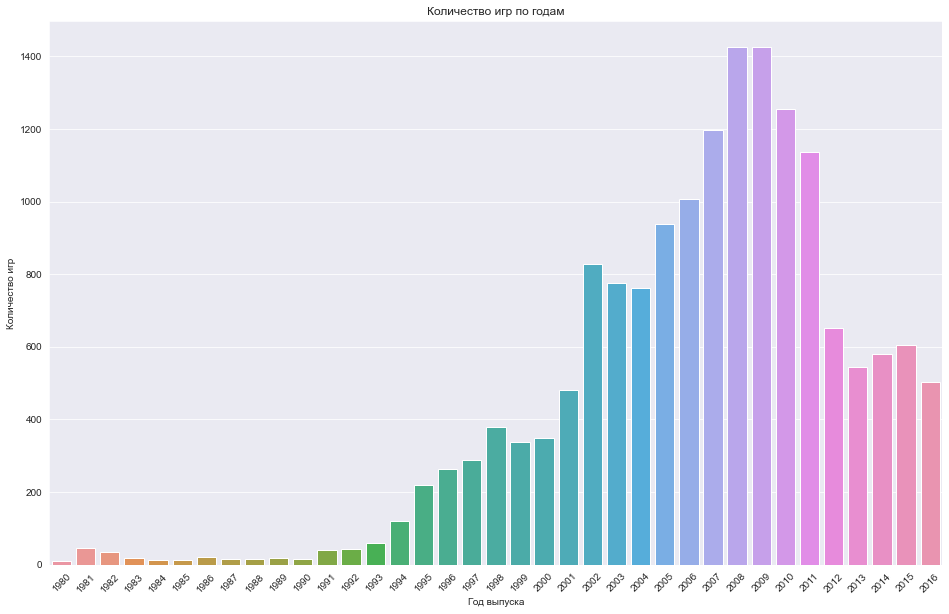

In [42]:
plt.figure(figsize=(16, 10))
sns.barplot(data=games_by_year, x='year_of_release', y='games_quantity')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

В датафрейме присутствуют данные с 1980 по 2016 года. С 1980 по 1993 выпускалось меньше всего игр, первый значительный рост количества игр пришёлся на 1994-1995 года, была преодолена отметка в 200 игр. Затем количество игр заметно возрасло в 2002, впервые преодолев отметку в 800 игр. Больше всего игр (более 1400) выходило в 2008-2009 годах, после чего количество выпускаемых игр пошло на спад, около 600 в год.

Рассмотрим продажи игр в разбивке по платформам. 

In [43]:
sales_by_platforms = (
    games.groupby('platform')
    .agg({'total_sales':'sum'})
    .sort_values('total_sales', ascending=False)
    .reset_index()
)
sales_by_platforms

,platform,total_sales
0,PS2,1233.56
1,X360,959.99
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


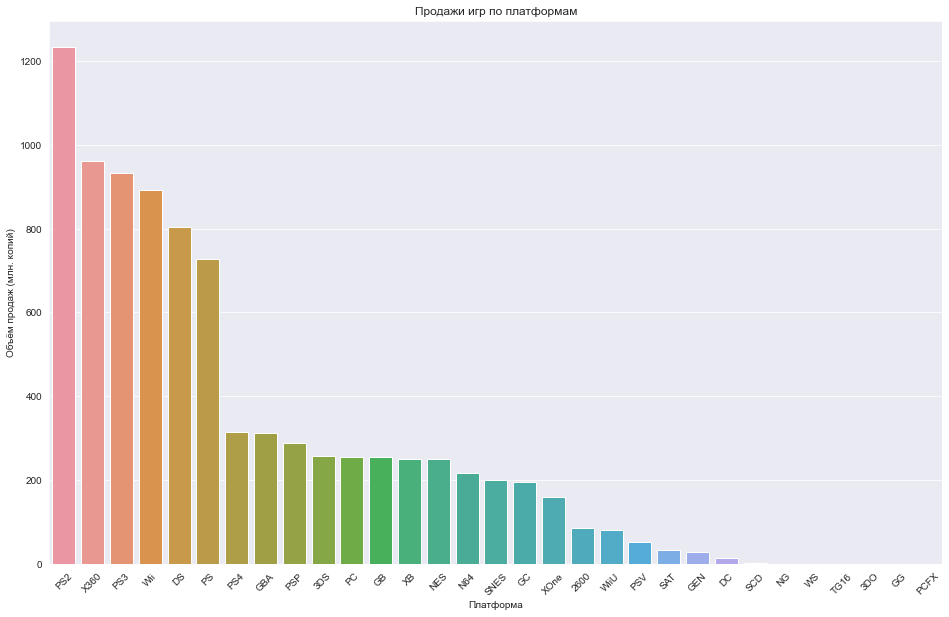

In [44]:
plt.figure(figsize=(16, 10))
sns.barplot(data=sales_by_platforms, x='platform', y='total_sales')
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж (млн. копий)')
plt.xticks(rotation=45)
plt.show()

Больше всего продаж с значительным отрывом принесли игры на платформе **PS2**. После этой платформы следуют **X360** и **PS3**. На шестом месте располагается платформа **PS**, после чего наблюдается заметное падение в продажах. Сохраним топ-6 платформ по продажам и посчитаем распределение игр для этих платформ по годам.

In [45]:
top_platforms = sales_by_platforms['platform'].head(6).tolist()
games_for_top_platforms = games.query('platform in @top_platforms')

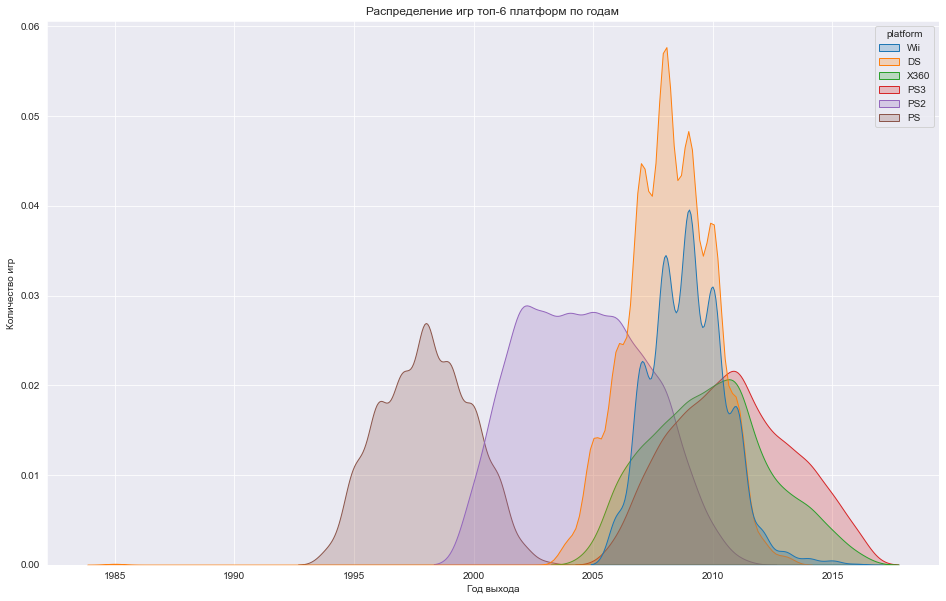

In [46]:
plt.figure(figsize=(16, 10))
sns.kdeplot(data=games_for_top_platforms, x='year_of_release', hue='platform', fill=True)
plt.title('Распределение игр топ-6 платформ по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.show()

По графику распределения мы можем сделать вывод, что пик продаж игр на определённую платформу длится около 4-6 лет. Так же можно заметить, что в течение около 5 лет после выхода консоли нового поколения, продолжают выходить игры и на консоль старого поколения. Посчитаем средний срок жизни платформ.

In [47]:
platform_lifetime = (
    games.groupby('platform')['year_of_release'].max() -
    games.groupby('platform')['year_of_release'].min()
).sort_values(ascending=False)
platform_lifetime.describe()

count    31.000000
mean      7.612903
std       6.998464
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      31.000000
Name: year_of_release, dtype: float64

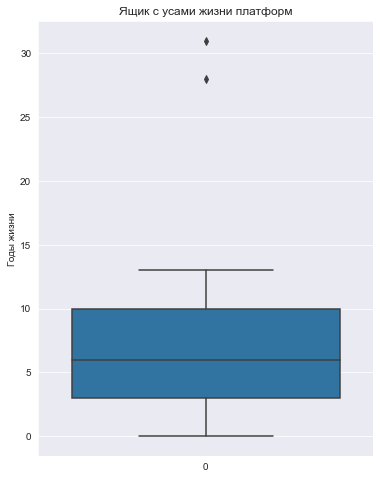

In [48]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=platform_lifetime)
plt.title('Ящик с усами жизни платформ')
plt.ylabel('Годы жизни')
plt.show()

Медианный срок жизни платформы составляет составляет 6 лет. Два выброса на графике - это платформы **PC** и **DS**.

### Анализ актуального периода

Для дальнейшего исследования и прогнозов на 2017 год нам нужно взять актуальные данные. Учитывая предыдущие наблюдения, лучше всего взять данные за 4 года. Так как данные за 2016 год у нас неполные, мы возьмём данные начиная с 2012 года. До этого года был пик по количеству выпускаемых данных, а начиная с 2012 произошёл спад и количество выпускаемых игр стабилизировалось.

In [49]:
# сохраним в новый датафрейм интересующий нас период
current_games = games.query('year_of_release >= 2012').reset_index(drop=True)
current_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2884 non-null   object 
 1   platform         2884 non-null   object 
 2   year_of_release  2884 non-null   int32  
 3   genre            2884 non-null   object 
 4   na_sales         2884 non-null   float64
 5   eu_sales         2884 non-null   float64
 6   jp_sales         2884 non-null   float64
 7   other_sales      2884 non-null   float64
 8   critic_score     1310 non-null   float64
 9   user_score       1529 non-null   float64
 10  rating           2884 non-null   object 
 11  total_sales      2884 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 259.2+ KB


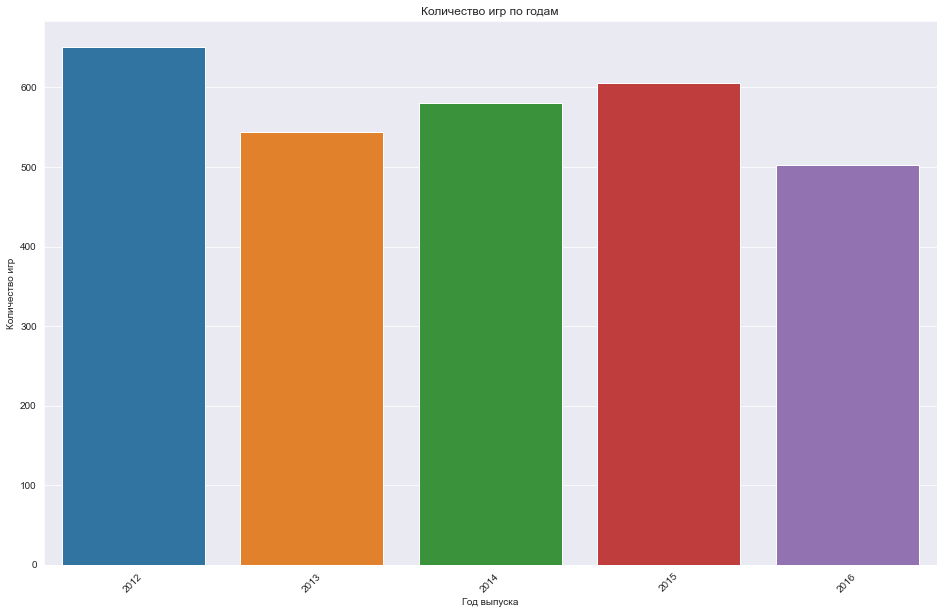

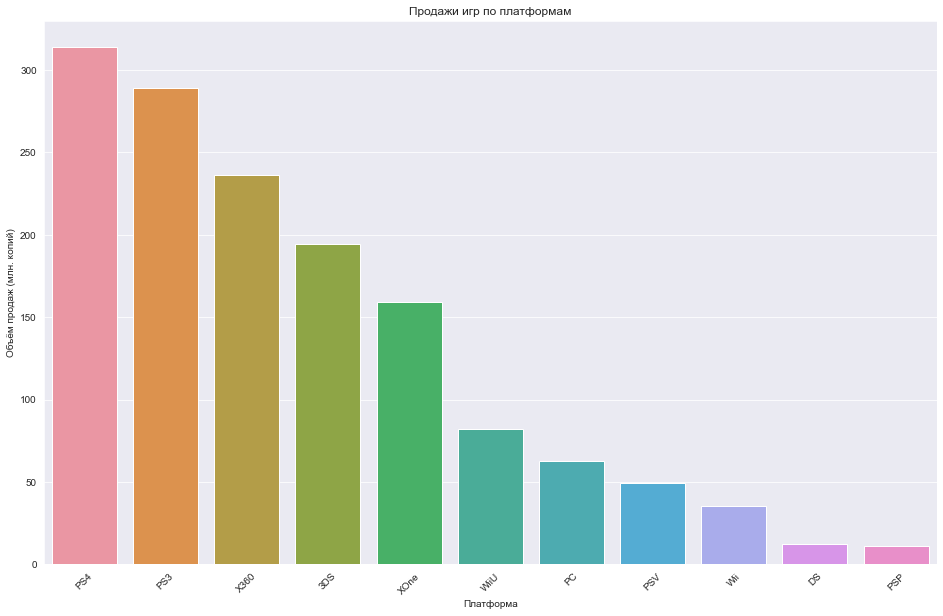

In [50]:
current_games_by_year = current_games.groupby('year_of_release').count()['name'].reset_index()
current_games_by_year.rename(columns={'name': 'games_quantity'}, inplace=True)

plt.figure(figsize=(16, 10))
sns.barplot(data=current_games_by_year, x='year_of_release', y='games_quantity')
plt.title('Количество игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

current_sales_by_platforms = (
    current_games.groupby('platform')
    .agg({'total_sales':'sum'})
    .sort_values('total_sales', ascending=False)
    .reset_index()
)

plt.figure(figsize=(16, 10))
sns.barplot(data=current_sales_by_platforms, x='platform', y='total_sales')
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж (млн. копий)')
plt.xticks(rotation=45)
plt.show()

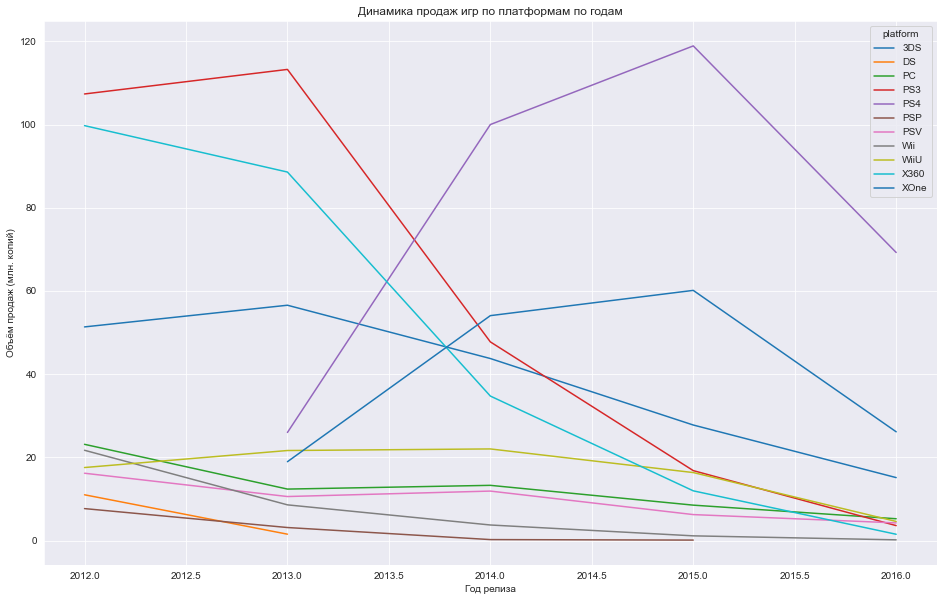

In [51]:
(
    current_games
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .plot(
        figsize=(16, 10),
        title='Динамика продаж игр по платформам по годам',
        xlabel='Год релиза',
        ylabel='Объём продаж (млн. копий)'
    )
)
plt.show()

Значительное падение продаж в актуальный период происходит у игр на платформах **PS3** и **X360**. Самыми перспективными на данном этапе кажутся следующие поколения этих консолей: **PS4** и **XOne**.

Построим ящики с усами для продаж по платформам.

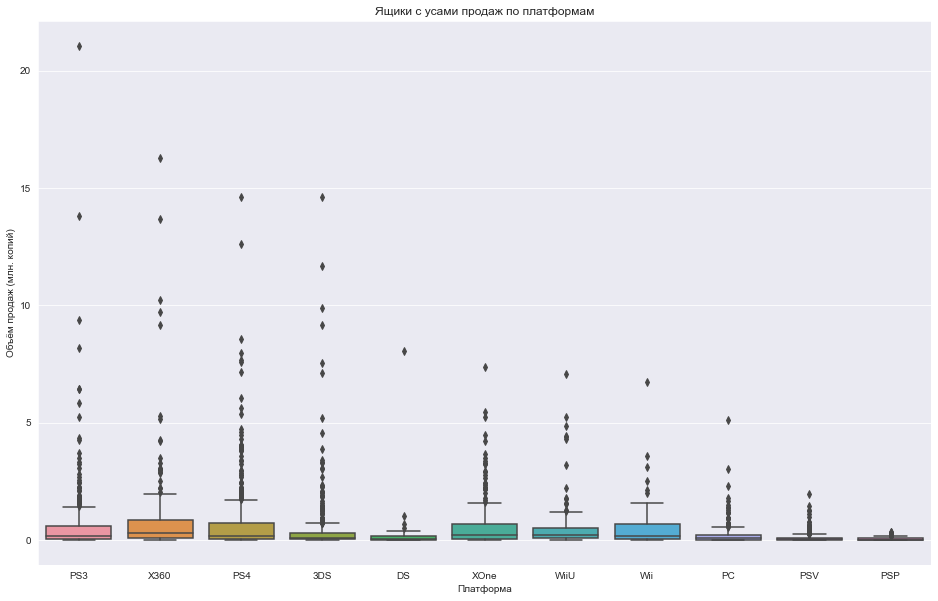

In [52]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=current_games, x='platform', y='total_sales')
plt.title('Ящики с усами продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж (млн. копий)')
plt.show()

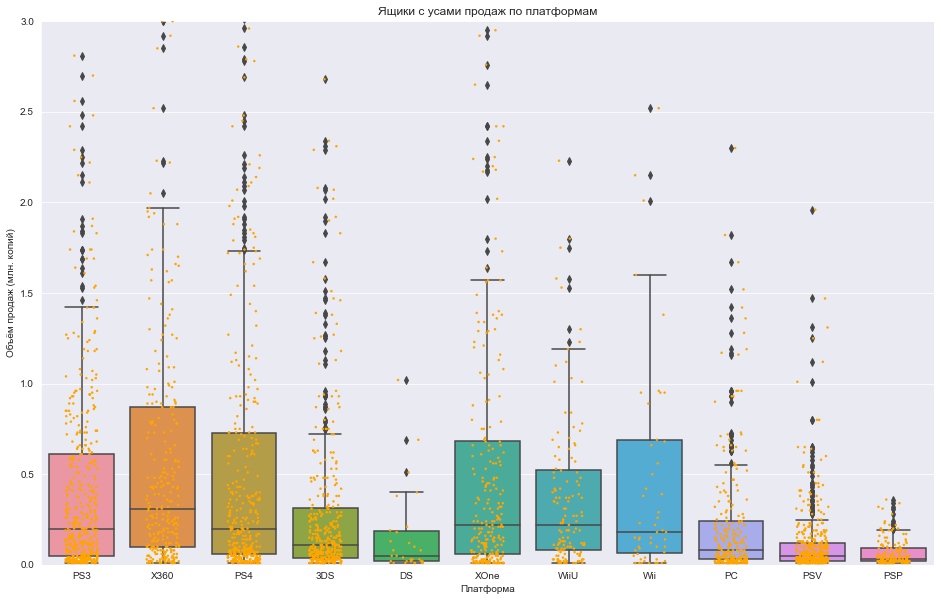

In [53]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=current_games, x='platform', y='total_sales')
ax = sns.stripplot(x='platform', y='total_sales', data=current_games, color="orange", jitter=0.2, size=2.5)
plt.title('Ящики с усами продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объём продаж (млн. копий)')
plt.ylim((0, 3))
plt.show()

In [54]:
current_games.groupby('platform')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,292.0,0.810068,1.712069,0.01,0.1000,0.31,0.8700,16.27
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
PC,249.0,0.251285,0.495518,0.01,0.0300,0.08,0.2400,5.14
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06


Самые высокие медианные продажи за акутальный период у платформы **X360**.

По предыдущим графикам мы могли наблюдать значительные выбросы, а также тот факт, что среднее арифметическое продаж заметно выше, чем медиана. Это говорит о том, что у каждой платформы есть игры-хиты, которые приносят продажи значительно выше, чем средние продажи по платформе.

Возьмём самую популярную платформу за актуальный период - **PS4**, и посмотрим, как влияют на продажи отзывы пользователей и критиков.

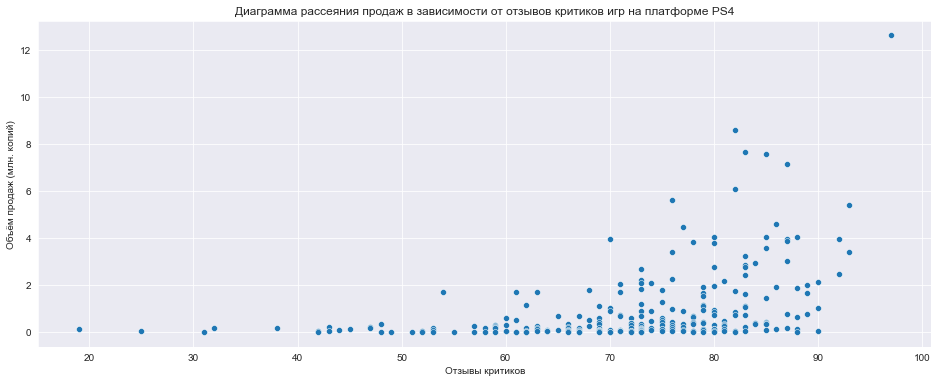

Корреляция продаж и отзывов критиков игр на платформе PS4 составляет 0.41


In [55]:
ps4 = current_games.query('platform == "PS4"')

plt.figure(figsize=(16, 6))
sns.scatterplot(data=ps4, x='critic_score', y='total_sales')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов критиков игр на платформе PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Объём продаж (млн. копий)')
plt.show()

print('Корреляция продаж и отзывов критиков игр на платформе PS4 составляет', 
      round(ps4['critic_score'].corr(ps4['total_sales']), 2))

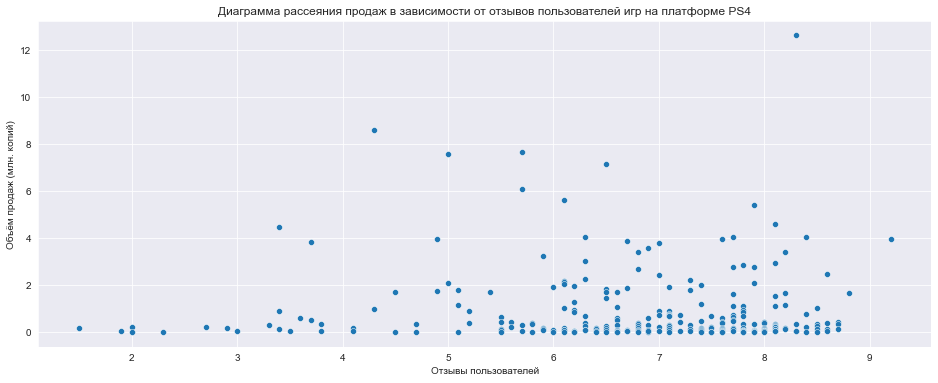

Корреляция продаж и отзывов пользователей игр на платформе PS4 составляет -0.03


In [56]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=ps4, x='user_score', y='total_sales')
plt.title('Диаграмма рассеяния продаж в зависимости от отзывов пользователей игр на платформе PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Объём продаж (млн. копий)')
plt.show()

print('Корреляция продаж и отзывов пользователей игр на платформе PS4 составляет', 
      round(ps4['user_score'].corr(ps4['total_sales']), 2))

По платформе **PS4** мы можем сделать вывод, что присутствует прямая корреляция между продажами игр и отзывами критиков, но эта корреляция слабая, она составляет 0,41. Что касается отзывов пользователей, заметная корреляция между и ними и продажами отсутствует. Вероятно пользователи больше доверяют отзывам критиков, чем других пользователей, либо отзывы критиков могут также зависеть от продаваемости игры. Посмотрим, совпадают ли наши наблюдения с играми на других популярных платформах.

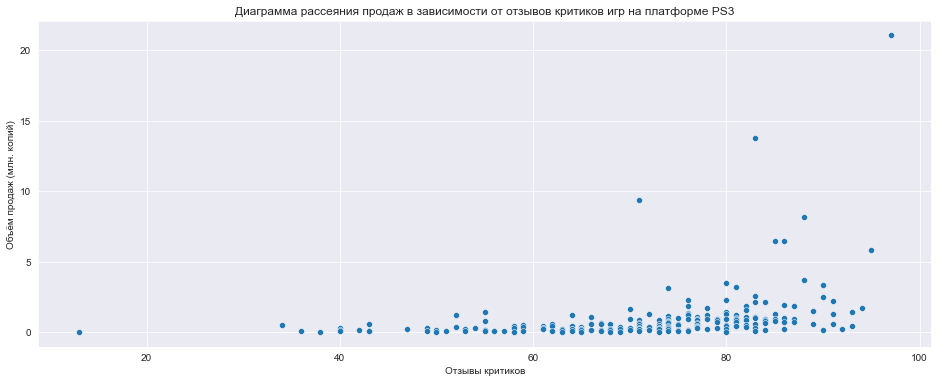

Корреляция продаж и отзывов критиков игр на платформе PS3 составляет 0.33


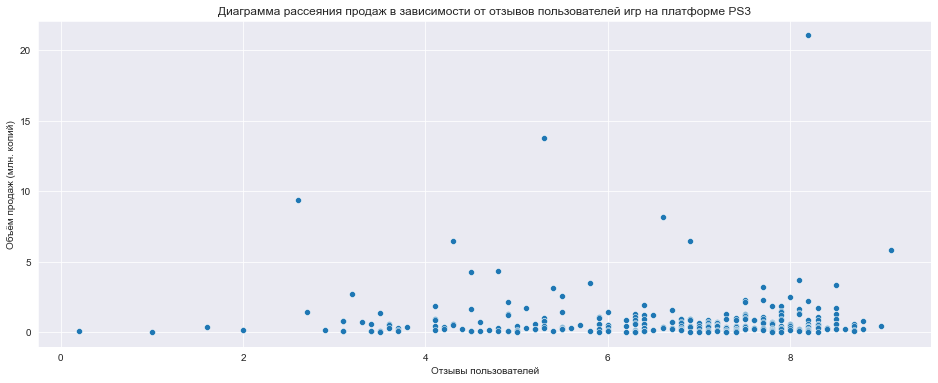

Корреляция продаж и отзывов пользователей игр на платформе PS3 составляет -0.01


---

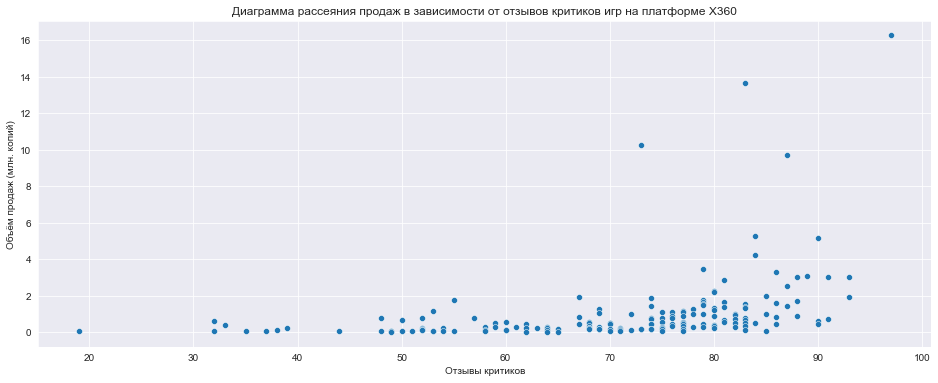

Корреляция продаж и отзывов критиков игр на платформе X360 составляет 0.36


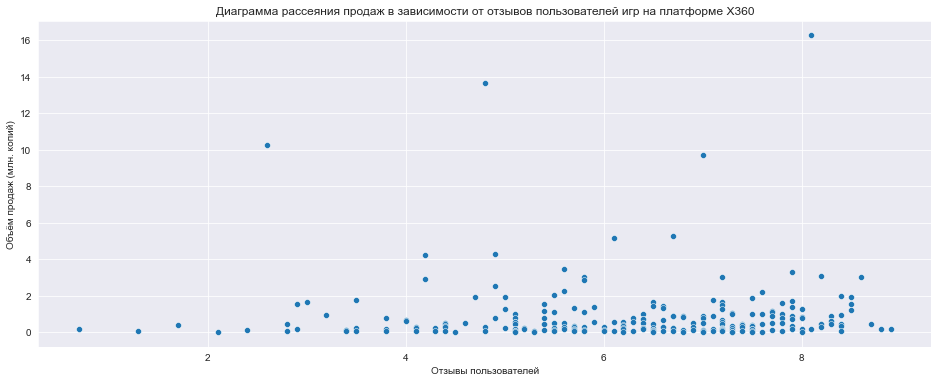

Корреляция продаж и отзывов пользователей игр на платформе X360 составляет 0.01


---

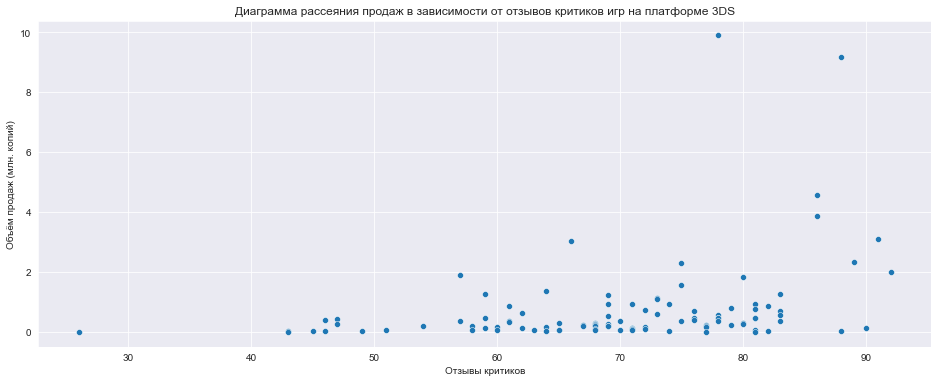

Корреляция продаж и отзывов критиков игр на платформе 3DS составляет 0.32


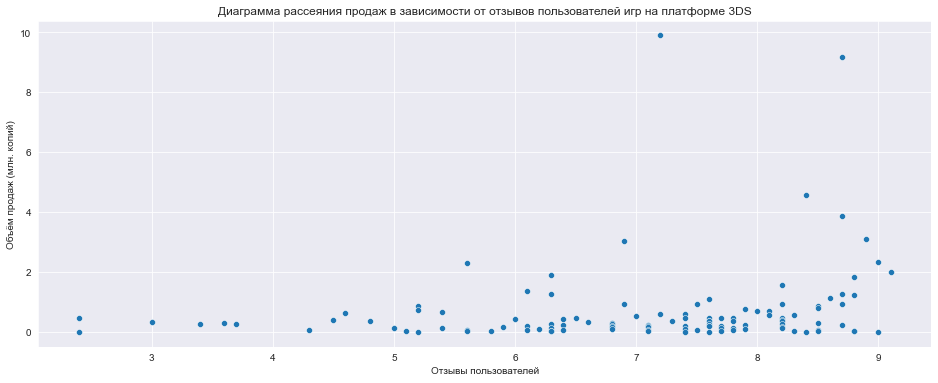

Корреляция продаж и отзывов пользователей игр на платформе 3DS составляет 0.2


---

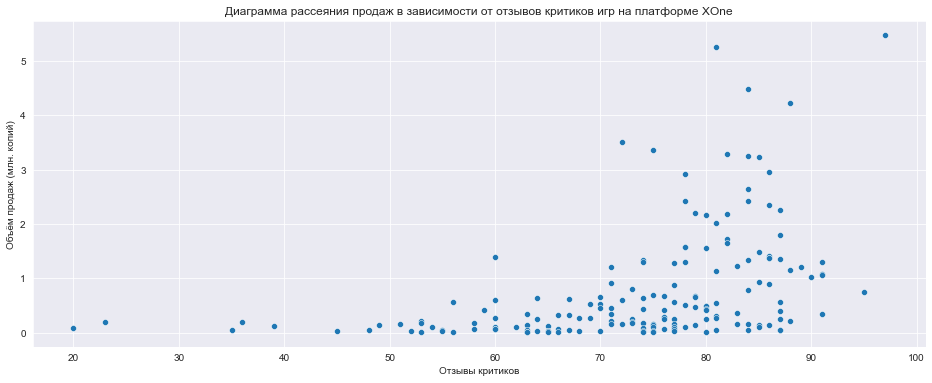

Корреляция продаж и отзывов критиков игр на платформе XOne составляет 0.42


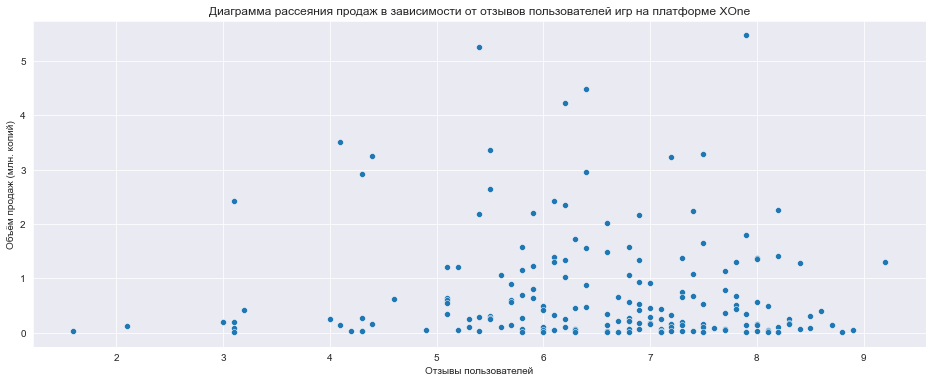

Корреляция продаж и отзывов пользователей игр на платформе XOne составляет -0.07


---

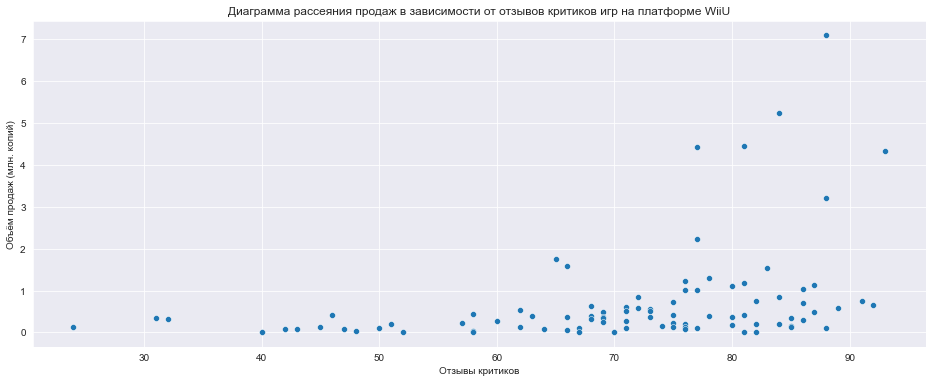

Корреляция продаж и отзывов критиков игр на платформе WiiU составляет 0.35


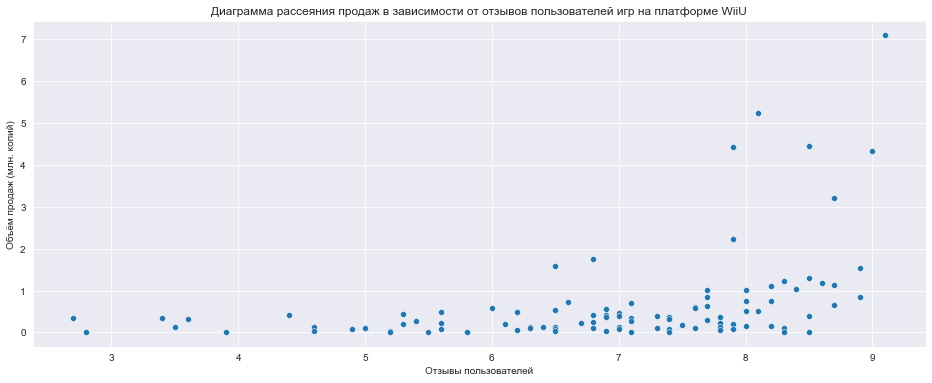

Корреляция продаж и отзывов пользователей игр на платформе WiiU составляет 0.4


---

In [57]:
top_current_platforms = current_sales_by_platforms['platform'].head(6).to_list()

for platform in top_current_platforms[1:]:
    data = current_games.query('platform == @platform')
    
    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=data, x='critic_score', y='total_sales')
    plt.title(f'Диаграмма рассеяния продаж в зависимости от отзывов критиков игр на платформе {platform}')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Объём продаж (млн. копий)')
    plt.show()

    print(f'Корреляция продаж и отзывов критиков игр на платформе {platform} составляет', 
          round(data['critic_score'].corr(data['total_sales']), 2))
    
    plt.figure(figsize=(16, 6))
    sns.scatterplot(data=data, x='user_score', y='total_sales')
    plt.title(f'Диаграмма рассеяния продаж в зависимости от отзывов пользователей игр на платформе {platform}')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Объём продаж (млн. копий)')
    plt.show()

    print(f'Корреляция продаж и отзывов пользователей игр на платформе {platform} составляет', 
          round(data['user_score'].corr(data['total_sales']), 2))
    
    display(Markdown('---'))

Практически по всех случаях наши наблюдения подтвердились. Корреляция между отзывами критиков и продажами слабая, а корреляция между отзывами пользователей и продажами или очень слабая, или отсутствует вовсе. Исключение составила платформа WiiU. Это можно объяснить тем, что на этой платформе не выходили особо крупные AAA проекты, и игры скорее выбирались по отзывам других пользователей, а не критиков.

Посмотрим на распределение игр по жанрам.

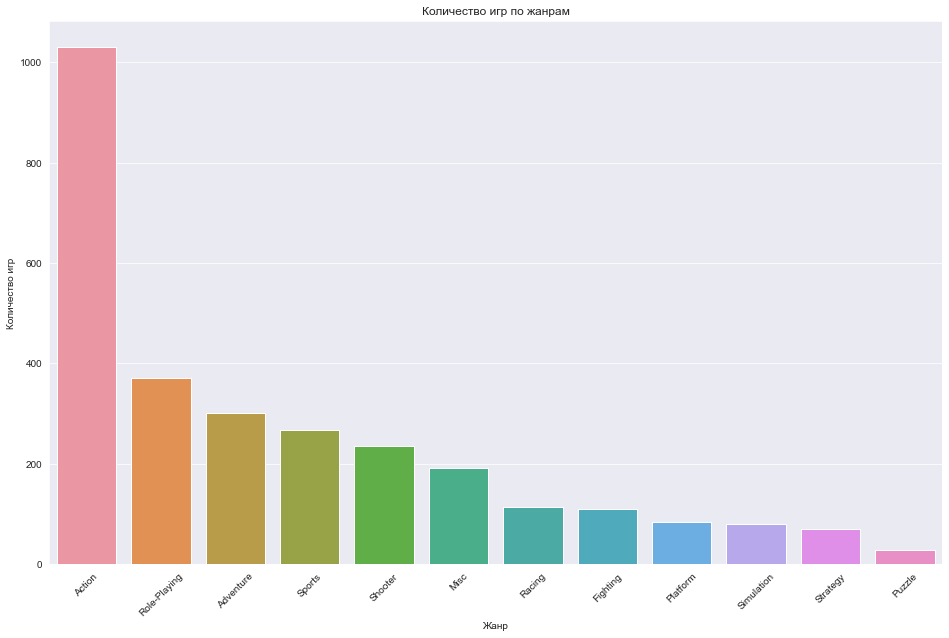

In [58]:
plt.figure(figsize=(16, 10))
sns.barplot(
    data=current_games.groupby('genre').count()['name'].reset_index().sort_values('name', ascending=False), 
    x='genre', 
    y='name'
)
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()

По количеству игр за актуальный период с большим отрывом лидирует жанр **Action**, количество игр этого жанра превысило 1000. Следующий за ним жанр **Role-Playing** набрал менее 400 игр. Меньше всего игр жанра **Puzzle**. 

Построим ящики с усами продаж по жанрам.

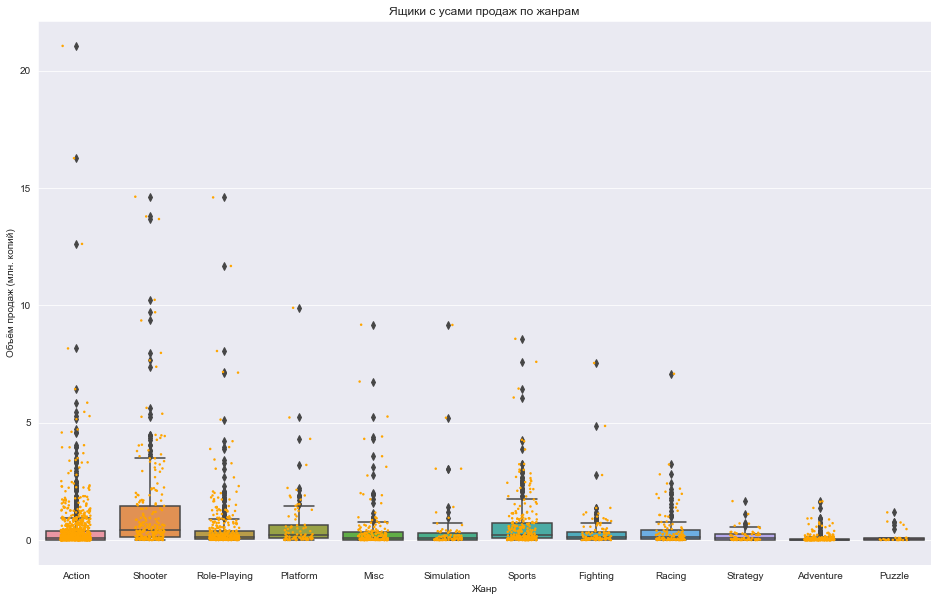

In [59]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=current_games, x='genre', y='total_sales')
ax = sns.stripplot(x='genre', y='total_sales', data=current_games, color="orange", jitter=0.2, size=2.5)
plt.title('Ящики с усами продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объём продаж (млн. копий)')
plt.show()

Опять мы можем наблюдать значительные выбросы, поэтому посмотрим на этот график с масштабом.

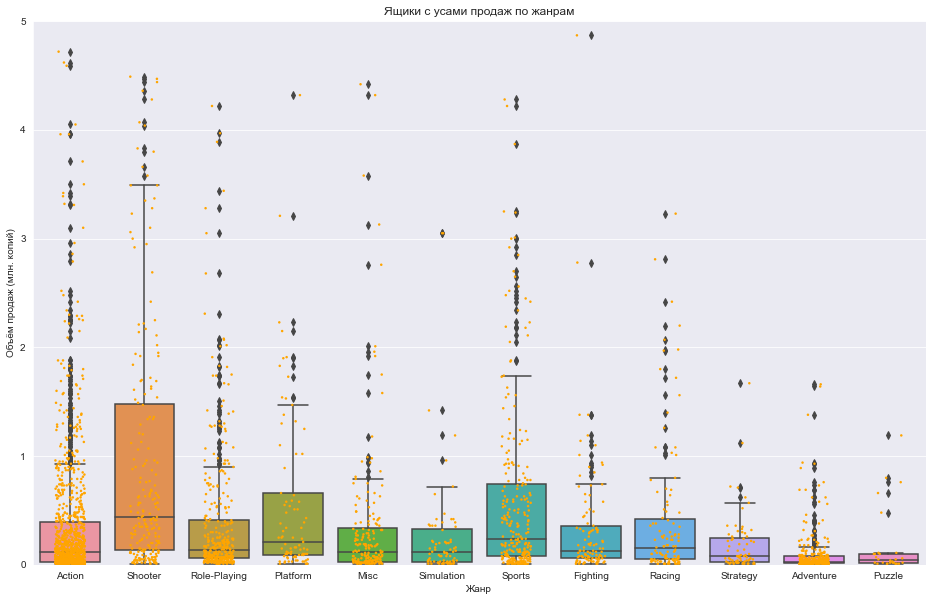

In [60]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(data=current_games, x='genre', y='total_sales')
ax = sns.stripplot(x='genre', y='total_sales', data=current_games, color="orange", jitter=0.2, size=2.5)
plt.title('Ящики с усами продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объём продаж (млн. копий)')
plt.ylim((0, 5))
plt.show()

In [61]:
current_games.groupby('genre')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63
Sports,267.0,0.678127,1.137778,0.01,0.080,0.240,0.7450,8.58
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Racing,114.0,0.468596,0.891845,0.01,0.050,0.150,0.4250,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Simulation,80.0,0.439000,1.244500,0.01,0.030,0.120,0.3275,9.17


Мы можем сделать вывод, что в среднем самые продаваемые игры относятся к жанру **Shooter**, после него идут жанры **Sports** и **Platform**. Однако самые большие выбросы, то есть, самые продаваемые игры, относятся к жанру **Action**. Наименее продаваемые игры относятся к жанрам **Puzzle** и **Adventure**.

### Портреты пользователей по регионам

#### Самые популярные платформы

Рассмотрим топ-5 популярных платформ по регионам.

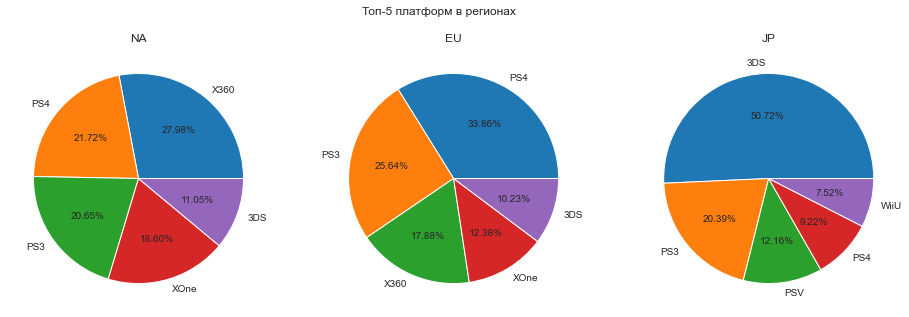

In [62]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

plt.figure(figsize=(16, 5)).suptitle('Топ-5 платформ в регионах')
i = 1

for region in regions:
    data = current_games.groupby('platform').agg({region: 'sum'}).sort_values(by=region, ascending=False).head(5)
    plt.subplot(1, 3, i)
    plt.pie(
        data=data,
        x=region, 
        labels=data.index,
        autopct='%.2f%%'
    )
    plt.title(region[:2].upper())
    i += 1
plt.show()

Самая популярная платформа в Северной Америке - `X360`, в Европе - `PS4`, в Японии - `3DS`.

#### Самые популярные жанры

Рассмотрим топ-5 популярных жанров по регионам.

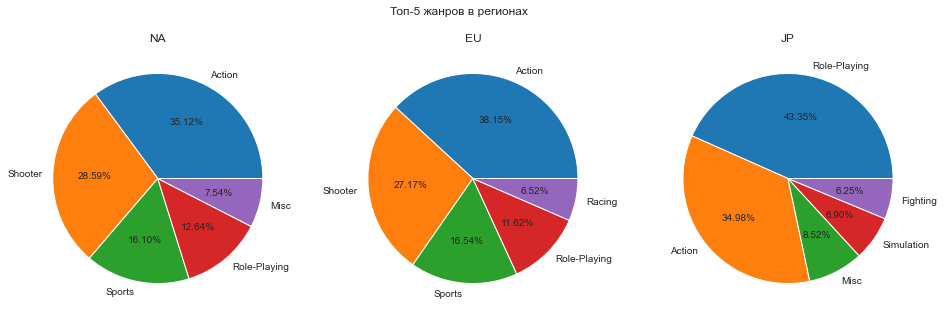

In [63]:
plt.figure(figsize=(16, 5)).suptitle('Топ-5 жанров в регионах')
i = 1

for region in regions:
    data = current_games.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).head(5)
    plt.subplot(1, 3, i)
    plt.pie(
        data=data,
        x=region, 
        labels=data.index,
        autopct='%.2f%%'
    )
    plt.title(region[:2].upper())
    i += 1
plt.show()

Самый популярный жанр в Северной Америке - `Action`, в Европе - `Action`, в Японии - `Role-Playing`.

#### Влияние на продажи рейтинга ESRB

Обратим внимание на то, что рейтинг ESRB (англ. Entertainment Software Rating Board) присваивается играм в регионе `NA`. Посмотрим, как он влияет на продажи.

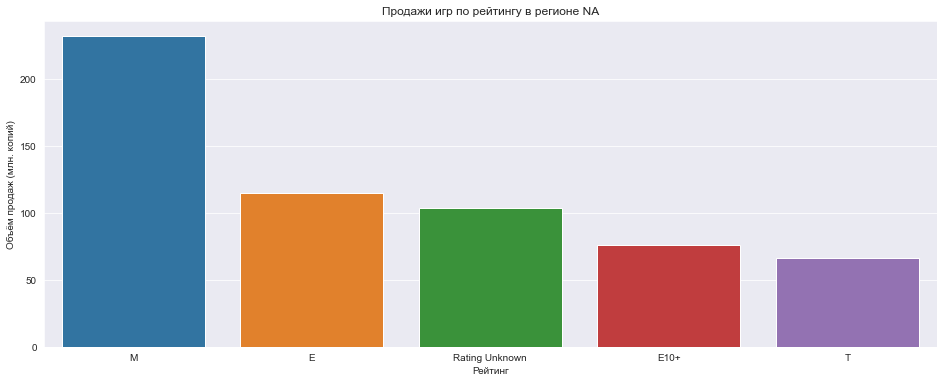

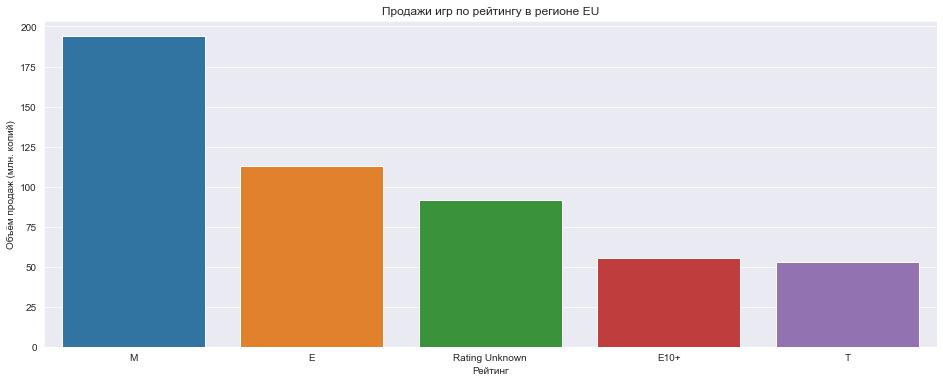

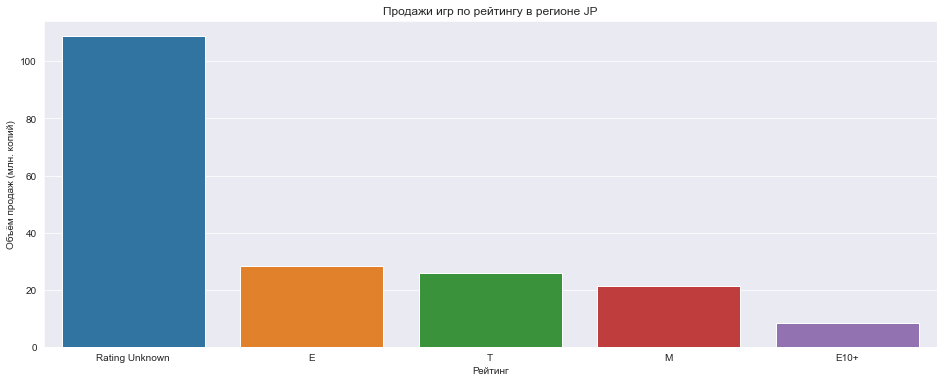

In [64]:
for region in regions:
    data = current_games.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
    plt.figure(figsize=(16, 6))
    sns.barplot(data=data, x='rating', y=region)
    plt.title('Продажи игр по рейтингу в регионе ' + region[:2].upper())
    plt.xlabel('Рейтинг')
    plt.ylabel('Объём продаж (млн. копий)')
    plt.show()

В Северной Америке и Европе распределение продаж по рейтингу практически одинаковое, самый продаваемый рейтинг - `M` ("Для взрослых"), после чего следуют `E`("Для всех") и игры с отсутствующим рейтингом. В Японии же с большим отрывом лидируют игры с отсутствующим рейтингом, так как рейтингом игр для Японии занимается другая компания (CERO).

#### Вывод

Среднестатистический пользователь компьютерных игр в `Северной Америке`:
- имеет приставку **X360** (28%), поддерживая производителя из своего региона, компанию Microsoft. Реже отдаёт предпочтение японским платформам **PS4** (22%) и **PS3** (21%)
- предпочитает играть в игры жанра **Action** (35%), реже **Shooter** (29%) или **Sports** (16%)
- покупает игры рейтинга **M**, реже рейтинга **E**  или вообще без рейтинга ESRB

Среднестатистический пользователь компьютерных игр в `Европе`:
- имеет приставку **PS4** (34%). Реже отдаёт предпочтение платформам **PS3** (26%) и **X360** (18%)
- предпочитает играть в игры жанра **Action** (38%), реже **Shooter** (27%) или **Sports** (17%)
- покупает игры рейтинга **M**, реже рейтинга **E**  или вообще без рейтинга ESRB

Среднестатистический пользователь компьютерных игр в `Японии`:
- имеет приставку **3DS** (51%). Реже отдаёт предпочтение платформам **PS3** (20%) и **PSV** (12%)
- предпочитает играть в игры жанра **Role-Playing** (43%), реже **Action** (35%) или **Misc** (9%)
- покупает игры без рейтинга ESRB, реже рейтинга **E**  или рейтинга **T**

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза (H_0)**: средний пользовательский рейтинг игр платформы Xbox One и средний пользовательский рейтинг платформы PC равны.

**Альтернативная гипотеза (H_1)**: средний пользовательский рейтинг игр платформы Xbox One и средний пользовательский рейтинг платформы PC *не* равны.

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи

Мы проверим эту гипотезу с помощью t-критерия Стьюдента. В качестве уровня статистической значимости возьмём alpha = 0.05. 

In [65]:
sample_1 = current_games.query('platform == "XOne"')['user_score']
sample_2 = current_games.query('platform == "PC"')['user_score']

aplha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False, # у нас нет оснований полагать, что дисперсии у генеральных совокупностей одинаковые
    nan_policy='omit' # игнорируем значения с пропусками
)

print('p-значение:', results.pvalue)
if results.pvalue < aplha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5065901030514672
Не получилось отвергнуть нулевую гипотезу


Мы не смогли отвергнуть нулевую гипотезу, которая гласит, что пользовательские рейтинги Xbox One и PC равны. Для проверки результатов теста посмотрим на значение среднего пользовательского рейтинга этих платформ.

In [66]:
current_games.query('platform in ("XOne", "PC")').groupby('platform')['user_score'].mean()

platform
PC      6.418537
XOne    6.521429
Name: user_score, dtype: float64

#### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза (H_0)**: средний пользовательский рейтинг игр жанра Action и средний пользовательский рейтинг жанра Sports равны.

**Альтернативная гипотеза (H_1)**: средний пользовательский рейтинг игр жанра Action и средний пользовательский рейтинг жанра Sports *не* равны.

Для проверки этой гипотезы также воcпользуемся t-критерием Стьюдента и также установим уровень статистической значимости alpha = 0.05.

In [67]:
sample_1 = current_games.query('genre == "Action"')['user_score']
sample_2 = current_games.query('genre == "Sports"')['user_score']

aplha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False, # у нас нет оснований полагать, что дисперсии у генеральных совокупностей одинаковые
    nan_policy='omit' # игнорируем значения с пропусками
)

print('p-значение:', results.pvalue)
if results.pvalue < aplha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.98945806646755e-20
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу, которая гласит, что пользовательские рейтинги жанров Action и Sports равны. Для проверки результатов теста посмотрим на значение среднего пользовательского рейтинга этих жанров.

In [68]:
current_games.query('genre in ("Action", "Sports")').groupby('genre')['user_score'].mean()

genre
Action    6.825048
Sports    5.455670
Name: user_score, dtype: float64

## Общий вывод

Мы провели исследование компьютерных игр для того, чтобы выявить закономерности, определяющие успешность игры. Для целей исследования мы использовали открытые исторические данные.

Нами был получен датафрейм, состоящий из 11 столбцов и 16715 строк. Мы провели предобработку данных, обработали пропуски, исправили типы данных, избавились от аномалий, а также добавили в датафрейм информацию об общих продажах игр во всех регионах.

Во время исследовательского анализа данных всего периода, за который нам представлены данные мы сформулировали первые наблюдения, такие как:
- датафрейме присутствуют данные с 1980 по 2016 года
- первый значительный рост количества выпускаемых игр пришёлся на 1994-1995 года
- больше всего игр в год (более 1400) выходило в 2008-2009 годах
- больше всего продаж за весь период принесли игры на платформе PS2, после этой платформы следуют X360 и PS3
- пик продаж игр на определённую платформу длится около 4-6 лет
- в течение около 5 лет после выхода консоли нового поколения, продолжают выходить игры и на консоль старого поколения
- медианный срок жизни платформы составляет составляет 6 лет

За актуальный период данных мы приняли решение взять период с 2012 года. Анализируя актуальный период, мы сделали следующие наблюдения:
- больше всего продаж игр приходится на платформу PS4
- значительное падение продаж происходит у игр на платформах PS3 и X360
- самыми перспективными кажутся консоли нового поколения PS4 и XOne
- сравнение корреляции продаж и отзывов критиков и пользователей игр популярных платформ показало, что есть слабая корреляция между отзывами критиков и продажами. Корреляция между отзывами пользователей и продажами или очень слабая, или отсутствует полностью 
- по количеству игр с большим отрывом лидирует жанр Action, количество игр этого жанра превышает 1000
- в среднем самые продаваемые игры относятся к жанру Shooter, после него идут жанры Sports и Platform
- самые большие выбросы, то есть, самые продаваемые игры, относятся к жанру Action

Мы составили портреты пользователя игр из Северной Америки, из Европы и из Японии.
- В Северной Америке чаще всего пользователь имеет приставку X360, играет в игры жанра Action и игры рейтинга "М"
- В Европе чаще всего пользователь имеет приставку PS4, играет в игры жанра Action и игры рейтинга "М"
- В Японии чаще всего пользователь имеет приставку 3DS, играет в игры жанра Role-Playing и игры без рейтинга ESRB

Мы проверили две гипотезы с помощью t-критерия Стьюдента и выяснили, что:
- средний пользовательский рейтинг игр платформы Xbox One и средний пользовательский рейтинг платформы PC равны
- средний пользовательский рейтинг игр жанра Action и средний пользовательский рейтинг жанра Sports разные



Для планирования рекламных кампаний мы рекомендуем считать потенциально успешными игры жанра **Action** или **Shooter**, которые выходят на консолях нового поколения **Xbox One** или **Playstation 4**, а также которые имеют рейтинг **"M" ("Mature")**. 
Для пользователей из Японии следует обратить внимание на игры жанра **Role-Playing**, не учитывая рейтинг ESRB.

Частью рекламных кампаний стоит сделать получение высоких оценок от критиков. При это оценки пользователей учитывать при проведении рекламных кампаний не так важно.